# Exercise


Do your work for this exercise in a notebook named `explore`. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

---

In [3]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
def prepare():
    df = get_store_data()
    print('Data acquired...')
    print('Converting to datetime')
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index("sale_date").sort_index()
    print('Sale date set to datetime and reindexed...')
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    df['sales_total']=df.sale_amount * df.item_price
    print('Added engineered columns...')
    print('Prepare complete')
    return df

In [20]:
def prepare2(): 
    df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
    print('Read power data from CSV...')
    print('Converting date to datetime...')
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index("Date").sort_index()
    print('Dates converted and reindexed...')
    df['month'] = df.index.month
    df['year'] = df.index.year
    print('Added engineered columns...')
    print('Null value counts:')
    print(df.isnull().sum())
    print()
    print('Filling NAs...')
    #df.ffill(inplace=True)
    #df.bfill(inplace=True)
    df.fillna(0, inplace=True)
    print()
    print('Null value counts:')
    print(df.isnull().sum())
    print('Data prep complete.')
    return df

---

### Store

In [6]:
df=prepare()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete
Data acquired...
Converting to datetime
Sale date set to datetime and reindexed...


NumExpr defaulting to 8 threads.


Added engineered columns...
Prepare complete


In [7]:
df.head()

,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13.0,1,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,211816,26.0,211817,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,832656,27.0,832657,45,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,213642,54.0,213643,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,7,15000 San Pedro Ave,San Antonio,8,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,215468,35.0,215469,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,8,735 SW Military Dr,San Antonio,9,TX,78221,1,Tuesday,294.00


---

## OPS

In [21]:
df=prepare2()

Read power data from CSV...
Converting date to datetime...
Dates converted and reindexed...
Added engineered columns...
Null value counts:
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

Filling NAs...

Null value counts:
Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64
Data prep complete.


In [12]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [16]:
df.Wind.value_counts()

0.000      1463
229.770       2
29.274        2
31.469        2
34.973        2
           ... 
329.651       1
263.516       1
383.741       1
118.332       1
153.288       1
Name: Wind, Length: 2914, dtype: int64

array([[<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>]], dtype=object)

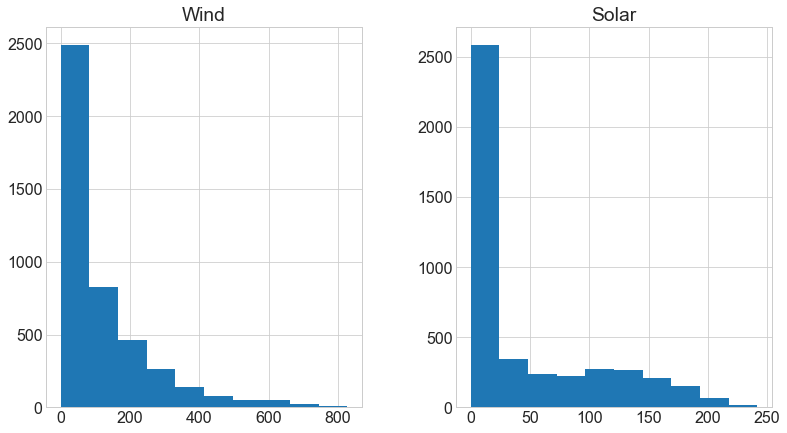

In [29]:
df[['Wind', 'Solar']].hist()

<AxesSubplot:xlabel='Date'>

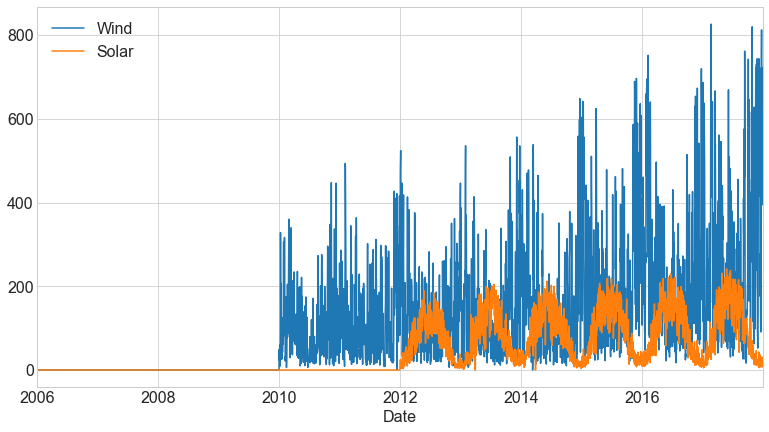

In [28]:
df[['Wind', 'Solar']].plot()

<AxesSubplot:xlabel='Date'>

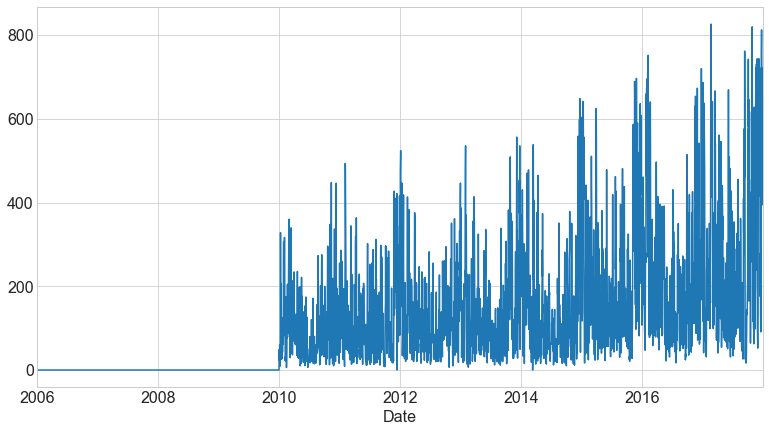

In [23]:
df.Wind.plot()

In [24]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


<AxesSubplot:xlabel='Date'>

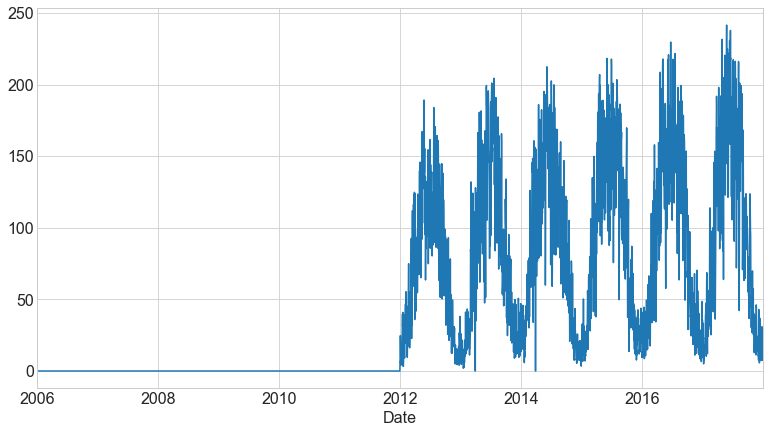

In [25]:
df.Solar.plot()